# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Scott Williamson 

### Date: 12/5/2024


In [20]:
import requests
import pickle
import spacy
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [21]:
import requests
from bs4 import BeautifulSoup
import pickle

# URL of the webpage to scrape
url = "https://www.9news.com/article/tech/science/environment/oil-gas-regulators-investigate-manipulated-environmental-tests-colorado/73-50ced691-757e-438d-9122-0079bd89398e"

# Send a GET request to fetch the raw HTML content
response = requests.get(url)

if response.status_code == 200:
    # Parse the HTML content with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Extract the article HTML
    article_html = soup.find('article')  
    
    # Check if the article was found
    if article_html:
        # Serialize the HTML content and save it to a .pkl file
        with open("article_html.pkl", "wb") as file:
            pickle.dump(str(article_html), file)
        print("Article HTML successfully saved to article_html.pkl")
    else:
        print("Article tag not found in the HTML.")
else:
    print(f"Failed to fetch the webpage. Status code: {response.status_code}")

Article HTML successfully saved to article_html.pkl


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [22]:
import pickle
from bs4 import BeautifulSoup
from textblob import TextBlob
import nltk
nltk.download('punkt')

file_path = "article_html.pkl"

# Load the HTML content
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and print the text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Perform sentiment analysis with TextBlob
blob = TextBlob(text)
polarity = blob.sentiment.polarity
print("Polarity Score:", polarity)

# Analyze sentiment
if polarity > 0:
    print("The article has a more positive connotation.")
elif polarity < 0:
    print("The article has a more negative connotation.")
else:
    print("The article has a neutral connotation.")

# Count the number of sentences in the article
import spacy
# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Process the text with spaCy
doc = nlp(text)

# Count the number of sentences
num_sentences = len(list(doc.sents))

print(f"Number of sentences in the article: {num_sentences}")

Polarity Score: 0.023330142080142065
The article has a more positive connotation.


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/scottwilliamson/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of sentences in the article: 43


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [23]:
import spacy
from collections import Counter

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content (from the previous code or file)
with open("article_html.pkl", "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
from bs4 import BeautifulSoup
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Create a list of tokens, converted to lowercase (excluding punctuation and stopwords)
tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]

# Calculate the frequency of each token
token_frequencies = Counter(tokens)

# Get the 5 most common tokens and their frequencies
common_tokens = token_frequencies.most_common(5)

# Print the common tokens with frequencies
print("The 5 most frequent tokens (converted to lowercase):")
for token, freq in common_tokens:
    print(f"Token: '{token}' - Frequency: {freq}")


The 5 most frequent tokens (converted to lowercase):
Token: '

' - Frequency: 24
Token: 'data' - Frequency: 14
Token: 'said' - Frequency: 14
Token: 'oil' - Frequency: 11
Token: 'gas' - Frequency: 11


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [24]:
import spacy
from collections import Counter
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Create a list of lemmas (converted to lowercase), excluding punctuation and stopwords
lemmas = [token.lemma_.lower() for token in doc if not token.is_punct and not token.is_stop]

# Calculate the frequency of each lemma
lemma_frequencies = Counter(lemmas)

# Get the 5 most common lemmas and their frequencies
common_lemmas = lemma_frequencies.most_common(5)

# Print the common lemmas with frequencies
print("The 5 most frequent lemmas (converted to lowercase):")
for lemma, freq in common_lemmas:
    print(f"Lemma: '{lemma}' - Frequency: {freq}")


The 5 most frequent lemmas (converted to lowercase):
Lemma: '

' - Frequency: 24
Lemma: 'datum' - Frequency: 14
Lemma: 'say' - Frequency: 14
Lemma: 'oil' - Frequency: 11
Lemma: 'gas' - Frequency: 11


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

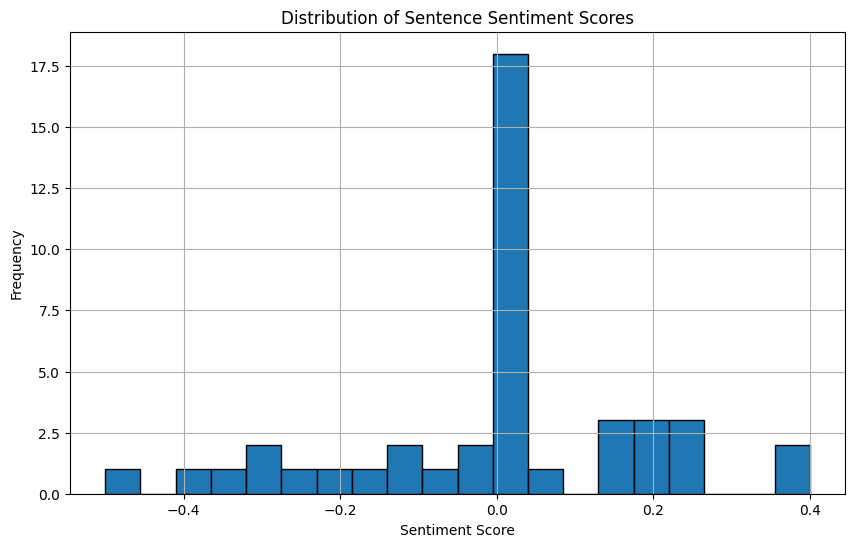

In [25]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# List to store the sentiment scores of each sentence
sentence_scores = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Get the sentiment polarity score using TextBlob
    blob = TextBlob(sent.text)
    sentence_scores.append(blob.sentiment.polarity)

# Plot a histogram of sentiment scores
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=20, edgecolor='black')
plt.title("Distribution of Sentence Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

The most common range of scores is overwhelmingly slightly above zero. 

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

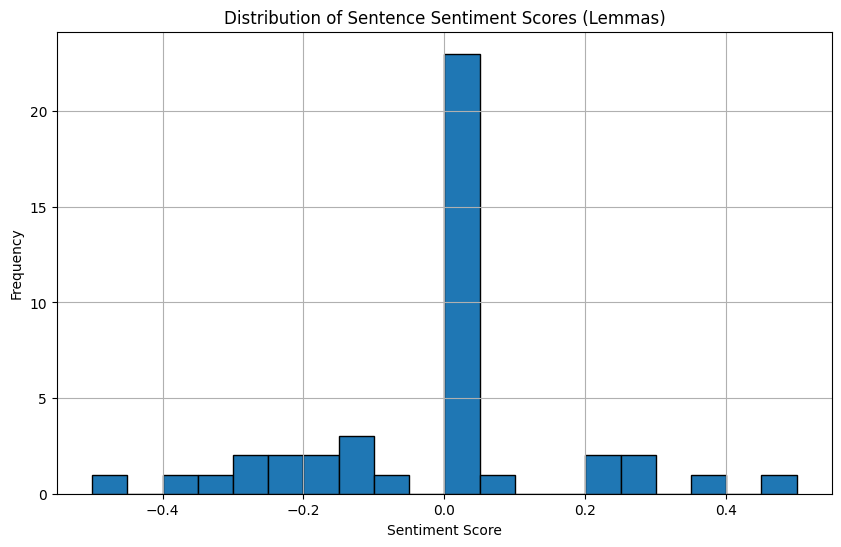

In [26]:
import spacy
from textblob import TextBlob
import matplotlib.pyplot as plt
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# List to store the sentiment scores of each sentence
sentence_scores_lemmas = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Lemmatize each token in the sentence and join them
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent if not token.is_punct and not token.is_stop])
    
    # Get the sentiment polarity score using TextBlob
    blob = TextBlob(lemmatized_sentence)
    sentence_scores_lemmas.append(blob.sentiment.polarity)

# Plot a histogram of sentiment scores based on lemmas
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores_lemmas, bins=20, edgecolor='black')
plt.title("Distribution of Sentence Sentiment Scores (Lemmas)")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


Same as the previous chart, the most common is the first bin above zero. 

7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 0.0
* Cutoff Score (lemmas): 0.0

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 7.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [27]:
import spacy
from textblob import TextBlob
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Define the cutoff score based on your requirement
cutoff_score_tokens = 0.0

# List to store sentences for the summary
sentence_list = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Get the sentiment polarity score using TextBlob for tokens
    blob = TextBlob(sent.text)
    score = blob.sentiment.polarity
    
    # If the score is greater than the cutoff score, add it to the summary
    if score > cutoff_score_tokens:
        sentence_list.append(sent.text.strip())

# Join the sentences together to form the summary
summary = ' '.join(sentence_list)

# Print the summary
print("Summary:")
print(summary)


Summary:
More Videos









Next up in 5
Example video title will go here for this video














Next up in 5
Example video title will go here for this video

























































Author: Marshall Zelinger
                

Published: 7:48 PM MST December 2, 2024
                

Updated: 7:48 PM MST December 2, 2024
                





 



WELD COUNTY, Colo. — Transparency and accountability. She detailed the basics of what ECMC knows. “We do not have information that the operators were aware of the falsification.” For oil and gas sites that are done extracting oil and gas, the state requires certain reporting as they are plugged and reclaimed. “I recognize that 350 is a large number," Murphy said. “I was made aware of this Monday afternoon,” Jason Maxey, Weld County’s Oil and Gas Energy Department Director told 9NEWS. “July probably wouldn't have been appropriate when the ECMC first found out. I'm sure they had some investigation to do a

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [28]:
import spacy
from textblob import TextBlob
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Define the cutoff score based on your requirement
cutoff_score_tokens = 0.0

# List to store sentences for the summary
sentence_list = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Get the sentiment polarity score using TextBlob for tokens
    blob = TextBlob(sent.text)
    score = blob.sentiment.polarity
    
    # If the score is greater than the cutoff score, add it to the summary
    if score > cutoff_score_tokens:
        sentence_list.append(sent.text.strip())

# Join the sentences together to form the summary
summary = ' '.join(sentence_list)

# Calculate the polarity score of the summary using TextBlob (based on tokens)
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score of the summary (based on token sentiment scores)
print("\nPolarity Score of the Summary (based on tokens):", summary_polarity)

# Count the number of sentences in the summary
summary_sentences = len(sentence_list)

# Print the number of sentences in the summarized article
print("Number of sentences in the summarized article:", summary_sentences)



Polarity Score of the Summary (based on tokens): 0.2186335403726708
Number of sentences in the summarized article: 12


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [29]:
import spacy
from textblob import TextBlob
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Define the cutoff score based on your requirement
cutoff_score_lemmas = 0.0

# List to store sentences for the summary
sentence_list = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Lemmatize each token in the sentence and join them
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent if not token.is_punct and not token.is_stop])
    
    # Get the sentiment polarity score using TextBlob for lemmatized sentence
    blob = TextBlob(lemmatized_sentence)
    score = blob.sentiment.polarity
    
    # If the score is greater than the cutoff score, add it to the summary
    if score > cutoff_score_lemmas:
        sentence_list.append(sent.text.strip())

# Join the sentences together to form the summary
summary = ' '.join(sentence_list)

# Print the summary
print("Summary:")
print(summary)



Summary:
“We do not have information that the operators were aware of the falsification.” For oil and gas sites that are done extracting oil and gas, the state requires certain reporting as they are plugged and reclaimed. “I recognize that 350 is a large number," Murphy said. “I was made aware of this Monday afternoon,” Jason Maxey, Weld County’s Oil and Gas Energy Department Director told 9NEWS. “July probably wouldn't have been appropriate when the ECMC first found out. I'm sure they had some investigation to do as well, but I sure would have hoped it would have been earlier than just the day before.” 










Maxey and Weld County do not require the same type of reporting that the state requires when an oil and gas site closes. “The range of falsified data is broad,” Murphy said. "If we determine we can no longer make that assumption, we may need other action and increase resources to change how we do business."


11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [30]:
import spacy
from textblob import TextBlob
import pickle
from bs4 import BeautifulSoup

# Load the spaCy model for English
nlp = spacy.load("en_core_web_sm")

# Load the article HTML content
file_path = "article_html.pkl"
with open(file_path, "rb") as file:
    article_html = pickle.load(file)

# Parse with BeautifulSoup and extract text
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()

# Process the text with spaCy pipeline
doc = nlp(text)

# Define the cutoff score based on your requirement
cutoff_score_lemmas = 0.0

# List to store sentences for the summary
sentence_list = []

# Iterate over each sentence in the text
for sent in doc.sents:
    # Lemmatize each token in the sentence and join them
    lemmatized_sentence = ' '.join([token.lemma_ for token in sent if not token.is_punct and not token.is_stop])
    
    # Get the sentiment polarity score using TextBlob for lemmatized sentence
    blob = TextBlob(lemmatized_sentence)
    score = blob.sentiment.polarity
    
    # If the score is greater than the cutoff score, add it to the summary
    if score > cutoff_score_lemmas:
        sentence_list.append(sent.text.strip())

# Join the sentences together to form the summary
summary = ' '.join(sentence_list)

# Calculate the polarity score of the summary using TextBlob (based on lemmas)
summary_blob = TextBlob(summary)
summary_polarity = summary_blob.sentiment.polarity

# Print the polarity score of the summary (based on lemma sentiment scores)
print("\nPolarity Score of the Summary (based on lemmas):", summary_polarity)

# Count the number of sentences in the summary
summary_sentences = len(sentence_list)

# Print the number of sentences in the summarized article
print("Number of sentences in the summarized article:", summary_sentences)



Polarity Score of the Summary (based on lemmas): 0.20892857142857146
Number of sentences in the summarized article: 8


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

Original:
Polarity Score: 0.023330142080142065
The article has a more positive connotation.
Number of sentences in the article: 43

Token Summary:
Polarity Score of the Summary (based on tokens): 0.2186335403726708
Number of sentences in the summarized article: 12

Lemmas Summary:
Polarity Score of the Summary (based on lemmas): 0.20892857142857146
Number of sentences in the summarized article: 8

There is a significantly more positive tone to the summaries. This is because all sentences with negative sentiment score have been removed. 



13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

There is little difference between the summaries. They use a lot of the same sentences. By the numbers the Token summary is slightly better, and it also has more sentences. 